## import the relavant packges
2020/8/10 version1 by wx

## 1.import relavant packages

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
from tensorflow import keras

%matplotlib inline

## 2.process the dataset

In [2]:
mnist_dataset, mnist_info = tfds.load(name='mnist',with_info = True, as_supervised = True)

mnist_trainset , mnist_testset = mnist_dataset['train'],mnist_dataset['test']

#validation_dataset
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples,tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples,tf.int64)


#scale the data
def scale(image,label):
    image = tf.cast(image,tf.float32)
    image /= 255.
    return image,label

scaled_train_validation_data = mnist_trainset.map(scale)
scaled_test_data = mnist_testset.map(scale)


#shuffle the data 
BUFFER_SIZE = 10000

shuffled_train_validation_data = scaled_train_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_validation_data.take(num_validation_samples)
train_data = shuffled_train_validation_data.skip(num_validation_samples)

#batch
BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scaled_test_data.batch(BATCH_SIZE)

validation_inputs,validation_targets = next(iter(validation_data))

In [12]:
print(train_data)

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


## 3.model

convolutional neuralnetwork

In [3]:
##CNN model without drop out

mymodel_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32 , 5, padding = 'same',activation = tf.nn.relu , input_shape = [28,28,1] ),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32 , 5, padding = 'same',activation = tf.nn.relu ),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024 , activation = tf.nn.relu),
    tf.keras.layers.Dense(10 , activation = tf.nn.softmax)
])

In [9]:
#CNN model with Dropout
mymodel_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32 , 5, padding = 'same',activation = tf.nn.relu , input_shape = [28,28,1] ),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32 , 5, padding = 'same',activation = tf.nn.relu ),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024 , activation = tf.nn.relu),
    tf.keras.layers.Dense(10 , activation = tf.nn.softmax)
])

In [55]:
#CNN model with Dropout and L2-normalization

mymodel_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32 , 5, padding = 'same',activation = tf.nn.relu ,
                           input_shape = [28,28,1],kernel_regularizer=tf.keras.regularizers.l2(0.001) ),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32 , 5, padding = 'same',activation = tf.nn.relu,
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024 , activation = tf.nn.relu),
    tf.keras.layers.Dense(10 , activation = tf.nn.softmax)
])

## 4.train the model


In [6]:
EPOCHS = 20
LEARING_RATE = 0.001


In [7]:

history  = {}

mymodel_1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARING_RATE),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

history['normal']= mymodel_1.fit(train_data , epochs = EPOCHS , validation_data=(validation_inputs,validation_targets),
            verbose=2)


Epoch 1/20
540/540 - 8s - loss: 0.1407 - accuracy: 0.9579 - val_loss: 0.0471 - val_accuracy: 0.9852
Epoch 2/20
540/540 - 7s - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0392 - val_accuracy: 0.9875
Epoch 3/20
540/540 - 7s - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0277 - val_accuracy: 0.9912
Epoch 4/20
540/540 - 7s - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0214 - val_accuracy: 0.9935
Epoch 5/20
540/540 - 7s - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0180 - val_accuracy: 0.9942
Epoch 6/20
540/540 - 7s - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0222 - val_accuracy: 0.9932
Epoch 7/20
540/540 - 7s - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0174 - val_accuracy: 0.9948
Epoch 8/20
540/540 - 7s - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.0114 - val_accuracy: 0.9960
Epoch 9/20
540/540 - 7s - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0092 - val_accuracy: 0.9967
Epoch 10/20
540/540 - 8s - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0087 - val_accuracy: 0.9973

In [10]:

mymodel_2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARING_RATE),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

history['dropout'] = mymodel_2.fit(train_data , epochs = EPOCHS , validation_data=(validation_inputs,validation_targets),
            verbose=2)

Epoch 1/20
540/540 - 8s - loss: 0.1679 - accuracy: 0.9469 - val_loss: 0.0559 - val_accuracy: 0.9827
Epoch 2/20
540/540 - 8s - loss: 0.0522 - accuracy: 0.9837 - val_loss: 0.0328 - val_accuracy: 0.9905
Epoch 3/20
540/540 - 8s - loss: 0.0365 - accuracy: 0.9883 - val_loss: 0.0330 - val_accuracy: 0.9902
Epoch 4/20
540/540 - 8s - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0214 - val_accuracy: 0.9938
Epoch 5/20
540/540 - 8s - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0205 - val_accuracy: 0.9928
Epoch 6/20
540/540 - 8s - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0179 - val_accuracy: 0.9943
Epoch 7/20
540/540 - 8s - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0119 - val_accuracy: 0.9968
Epoch 8/20
540/540 - 8s - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0154 - val_accuracy: 0.9945
Epoch 9/20
540/540 - 8s - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0119 - val_accuracy: 0.9965
Epoch 10/20
540/540 - 8s - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0115 - val_accuracy: 0.9960

In [56]:
mymodel_3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARING_RATE),
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

history['dropout_and_L2'] = mymodel_3.fit(train_data , epochs = EPOCHS , validation_data=(validation_inputs,validation_targets),
            verbose=2)

Epoch 1/20
540/540 - 8s - loss: 0.2037 - accuracy: 0.9467 - val_loss: 0.0890 - val_accuracy: 0.9808
Epoch 2/20
540/540 - 8s - loss: 0.0823 - accuracy: 0.9828 - val_loss: 0.0607 - val_accuracy: 0.9878
Epoch 3/20
540/540 - 8s - loss: 0.0662 - accuracy: 0.9864 - val_loss: 0.0544 - val_accuracy: 0.9888
Epoch 4/20
540/540 - 8s - loss: 0.0558 - accuracy: 0.9885 - val_loss: 0.0430 - val_accuracy: 0.9922
Epoch 5/20
540/540 - 8s - loss: 0.0496 - accuracy: 0.9903 - val_loss: 0.0424 - val_accuracy: 0.9918
Epoch 6/20
540/540 - 8s - loss: 0.0486 - accuracy: 0.9902 - val_loss: 0.0391 - val_accuracy: 0.9937
Epoch 7/20
540/540 - 8s - loss: 0.0421 - accuracy: 0.9923 - val_loss: 0.0394 - val_accuracy: 0.9923
Epoch 8/20
540/540 - 8s - loss: 0.0397 - accuracy: 0.9927 - val_loss: 0.0325 - val_accuracy: 0.9950
Epoch 9/20
540/540 - 8s - loss: 0.0400 - accuracy: 0.9925 - val_loss: 0.0317 - val_accuracy: 0.9945
Epoch 10/20
540/540 - 8s - loss: 0.0385 - accuracy: 0.9930 - val_loss: 0.0338 - val_accuracy: 0.9927

## 5. test the model

In [57]:
a = mymodel_1.evaluate(test_data)
b = mymodel_2.evaluate(test_data)
c = mymodel_3.evaluate(test_data)

100/100 [==============================] - ETA: 0s - loss: 0.1010 - accuracy: 0.99 - ETA: 0s - loss: 0.0388 - accuracy: 0.99 - ETA: 0s - loss: 0.0399 - accuracy: 0.99 - ETA: 0s - loss: 0.0438 - accuracy: 0.99 - ETA: 0s - loss: 0.0445 - accuracy: 0.99 - ETA: 0s - loss: 0.0452 - accuracy: 0.99 - ETA: 0s - loss: 0.0449 - accuracy: 0.99 - ETA: 0s - loss: 0.0452 - accuracy: 0.99 - ETA: 0s - loss: 0.0446 - accuracy: 0.99 - ETA: 0s - loss: 0.0440 - accuracy: 0.99 - ETA: 0s - loss: 0.0454 - accuracy: 0.99 - ETA: 0s - loss: 0.0461 - accuracy: 0.99 - ETA: 0s - loss: 0.0453 - accuracy: 0.99 - 1s 7ms/step - loss: 0.0458 - accuracy: 0.9908


In [59]:
print('model_1_accuracy = {:2f}%'.format(a[1]*100))
print('model_2_accuracy = {:2f}%'.format(b[1]*100))
print('model_3_accuracy = {:2f}%'.format(c[1]*100))

model_1_accuracy = 99.260002%
model_2_accuracy = 99.400002%
model_3_accuracy = 99.080002%


## 6.plot the map


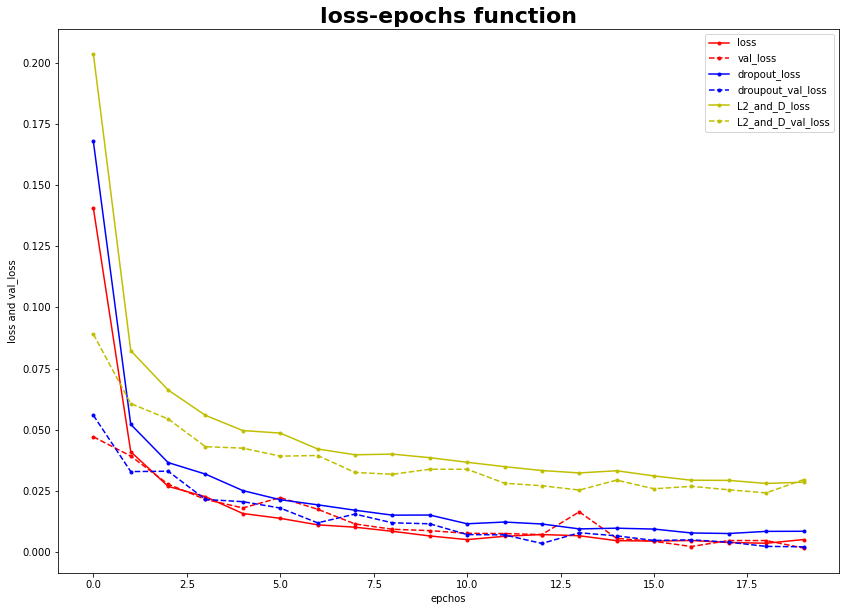

In [60]:

epochs = len(history['normal'].history['loss'])


plt.figure(figsize = (14,10))
plt.title('loss-epochs function' , fontdict = {'fontweight' : 'bold' , 'fontsize': 22})


plt.plot(range(epochs), history['normal'].history['loss'],'r.-', label='loss')
plt.plot(range(epochs), history['normal'].history['val_loss'],'r.--', label='val_loss')

plt.plot(range(epochs), history['dropout'].history['loss'], 'b.-', label='dropout_loss')
plt.plot(range(epochs), history['dropout'].history['val_loss'], 'b.--', label='droupout_val_loss')

plt.plot(range(epochs), history['dropout_and_L2'].history['loss'],'y.-', label='L2_and_D_loss')
plt.plot(range(epochs), history['dropout_and_L2'].history['val_loss'], 'y.--', label='L2_and_D_val_loss')



plt.ylabel('loss and val_loss')
plt.xlabel('epchos')


plt.legend()

plt.show()

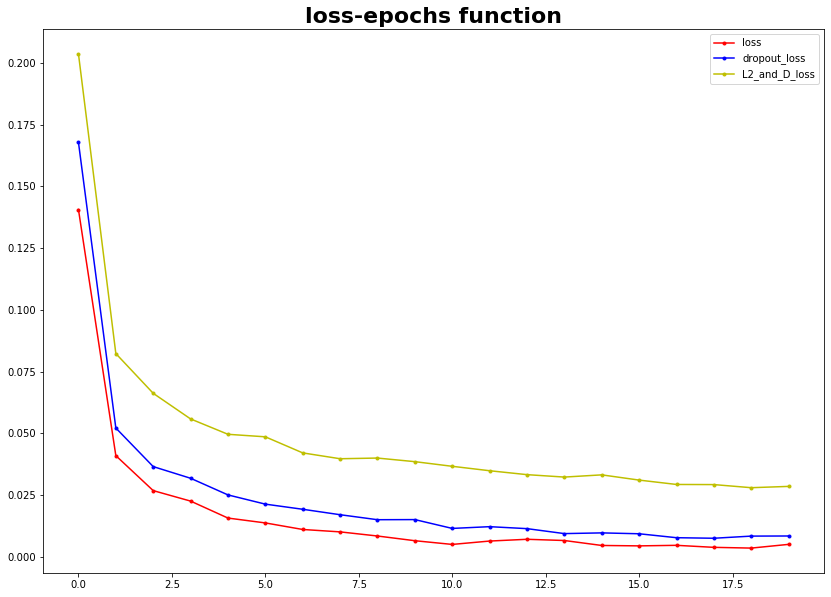

In [62]:
plt.figure(figsize = (14,10))
plt.title('loss-epochs function' , fontdict = {'fontweight' : 'bold' , 'fontsize': 22})

plt.plot(range(epochs), history['normal'].history['loss'],'r.-', label='loss')
plt.plot(range(epochs), history['dropout'].history['loss'], 'b.-', label='dropout_loss')
plt.plot(range(epochs), history['dropout_and_L2'].history['loss'],'y.-', label='L2_and_D_loss')

plt.legend()

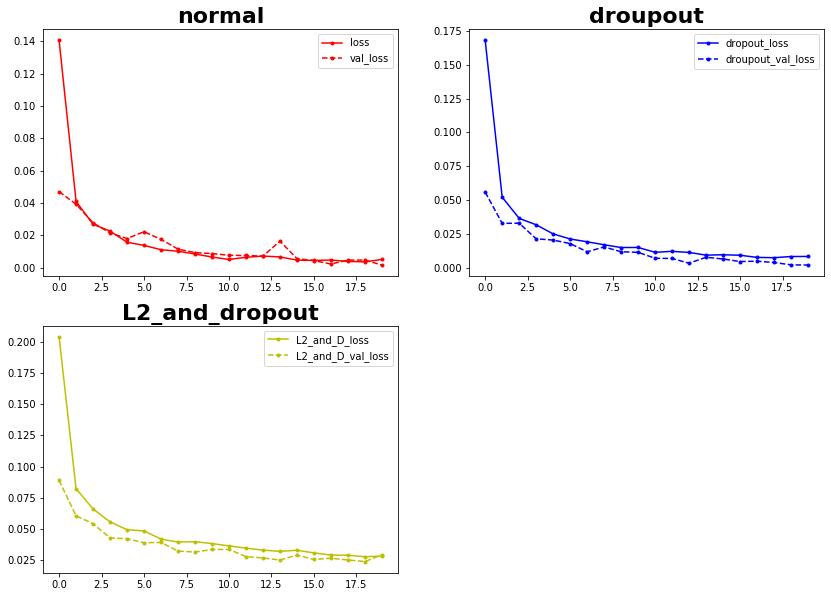

In [61]:
plt.figure(figsize = (14,10))


#第一行第一列图形
ax1 = plt.subplot(2,2,1)
#第一行第二列图形
ax2 = plt.subplot(2,2,2)
#第二行
ax3 = plt.subplot(2,2,3)


plt.sca(ax1)
plt.title('normal' , fontdict = {'fontweight' : 'bold' , 'fontsize': 22})
plt.plot(range(epochs), history['normal'].history['loss'],'r.-', label='loss')
plt.plot(range(epochs), history['normal'].history['val_loss'],'r.--', label='val_loss')
plt.legend()

plt.sca(ax2)
plt.title('droupout' , fontdict = {'fontweight' : 'bold' , 'fontsize': 22})
plt.plot(range(epochs), history['dropout'].history['loss'], 'b.-', label='dropout_loss')
plt.plot(range(epochs), history['dropout'].history['val_loss'], 'b.--', label='droupout_val_loss')
plt.legend()

plt.sca(ax3)
plt.title('L2_and_dropout' , fontdict = {'fontweight' : 'bold' , 'fontsize': 22})
plt.plot(range(epochs), history['dropout_and_L2'].history['loss'],'y.-', label='L2_and_D_loss')
plt.plot(range(epochs), history['dropout_and_L2'].history['val_loss'], 'y.--', label='L2_and_D_val_loss')
plt.legend()


plt.show()